In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 

In [2]:
data = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)
m, n = np.shape(data)
np.random.shuffle(data)
print(f"m = {m}, n = {n}")

m = 60000, n = 785


In [4]:
index = m * 0.20
index

12000.0

In [5]:
data_train = data[12000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [6]:
data_test = data[0:12000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.

In [7]:
def one_hot_encode(labels, num_classes=10):
    num_labels = len(labels)
    one_hot = np.zeros((num_labels, num_classes))
    one_hot[np.arange(num_labels), labels.astype(int)] = 1
    return one_hot

X_train shape: (48000, 28, 28, 1)
Y_train shape: (48000, 10)
X_test shape: (12000, 28, 28, 1)
Y_test shape: (12000, 10)

Original label: 7
One-hot encoded [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Sample image shape: (28, 28, 1)


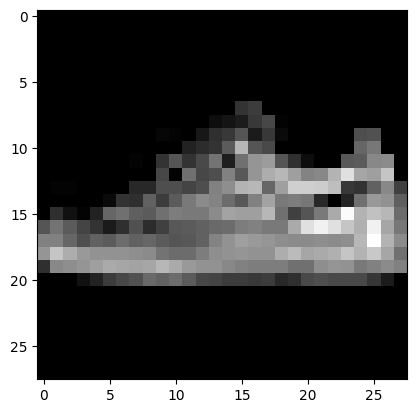

In [8]:
X_train = X_train.T.reshape(-1, 28, 28, 1)
X_test = X_test.T.reshape(-1, 28, 28, 1)
Y_train = one_hot_encode(Y_train)
Y_test = one_hot_encode(Y_test)

print("X_train shape:", X_train.shape) #(48000, 28, 28, 1)
print("Y_train shape:", Y_train.shape) #(48000, 10)
print("X_test shape:", X_test.shape) #(12000, 28, 28, 1)
print("Y_test shape:", Y_test.shape) #(12000, 1)

print("\nOriginal label:", np.argmax(Y_train[0]))
print("One-hot encoded", Y_train[0])

print("Sample image shape:", X_train[0].shape)
plt.imshow(X_train[0].squeeze(), cmap='gray')
plt.show()

In [9]:
def conv(image, kernel):
    kernel_h, kernel_w = kernel.shape
    img_h, img_w = image.shape
    output_h = img_h - kernel_h + 1
    output_w = img_w - kernel_w + 1

    output = np.zeros((output_h, output_w))
    for i in range(output_h):
        for j in range(output_w):
            output[i, j] = np.sum(image[i:i+kernel_h, j:j+kernel_w] * kernel)
    return output

def relu(Z):
    return np.maximum(0, Z)

def max_pooling(image, pool_size=(2,2)):
    pool_h, pool_w = pool_size
    img_h, img_w = image.shape
    output_h = img_h // pool_h
    output_w = img_w // pool_w

    output = np.zeros((output_h, output_w))

    for i in range(output_h):
        for j in range(output_w):
            output[i, j] = np.max(image[i * pool_h: (i+1)*pool_h, j * pool_w: (j+1)*pool_w])
    return output

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [10]:
class CNN:
    def __init__(self):
        self.conv_kernel = np.random.uniform(-0.1, 0.1, (3,3))
        self.fc_weights = np.randnom.uniform(-0.1, 0.1, (13 * 13 * 1, 10))
        self.fc_biases = np.zeros((1, 10))

    def forward(self, input_img):
        conv_output = convolve(input_img.squeeze(), self.conv_kernel)

        relu_output = relu(conv_output)

        pooled_output = max_pooling(relu_output)

        flattened = pooled_output.flatten()

        fc_output = fully_connected_layer(flattened, self.fc_weights, self.fc_biases)

        output_probs = softmax(fc_output.reshape(1, -1))

        return output_probs

In [11]:
def cross_entropy_loss(predictions, label):
    m = label.shape[1]
    loss = -np.sum(label*np.log(predictions + 1e-8)) / m
    return loss

In [12]:
def train_CNN(CNN, X_train, Y_train, epochs=10, learning_rate=0.01):
    for epoch in range(epochs):
        total_loss = 0
        for i in range(len(X_train)):
            input_img = X_train[i]
            target = Y_train[i]
            